In [1480]:
import numpy as np
import pandas as pd
import os
import glob
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from collections import defaultdict

In [1481]:
%matplotlib inline

In [1482]:
EXP_NAME = "resnet18_small_CIFAR100"  # resnet18_small_CIFAR10, resnet18_small_CIFAR100

In [1483]:
exp_root = f"/hdd/mliuzzolino/cascaded_distillation_nets/{EXP_NAME}/experiments/"

In [1484]:
roots = np.sort(glob.glob(f"{exp_root}/*"))
roots = [ele for ele in roots if "lr_0.1" not in ele]
# roots = [ele for ele in roots if "std," not in ele]

In [1485]:
[print(os.path.basename(ele)) for ele in roots];

cascaded_seq__parallel,lr_0.01,wd_0.0005,seed_42
cascaded_seq__parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.0
cascaded_seq__parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.25
cascaded_seq__parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.5
cascaded_seq__parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.75
cascaded_seq__parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_1.0
std,lr_0.001,wd_0.0005,seed_42,distillation,alpha_1.0
std,lr_0.01,wd_0.0005,seed_42
std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.0
std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.25
std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.5
std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.75
std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_1.0
td(0.0),parallel,lr_0.01,wd_0.0005,seed_42
td(0.0),parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.0
td(0.0),parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.25
td(0.0),parallel,lr_0.01,wd_0.0005,seed_42,distillation,alpha_

In [1486]:
df_dict = defaultdict(list)
for root in roots:
  if "cascaded_seq" in root:
    continue
  if os.path.basename(root) == "std,lr_0.01,wd_0.0005,seed_42":
    continue
  met_p = os.path.join(root, "metrics.pt")
  if not os.path.exists(met_p):
    continue
  if "td(0.5)" in root and "alpha_0.0" in root and "wd_0.001" not in root:
    continue
  exp_name = os.path.basename(root)
  distillation = False
  alpha = -1
  td = -1
  td_loss_mode = -1
  if exp_name.startswith("std"):
    model = "std"
    if "distillation" in exp_name:
      distillation = True
      alpha = float(exp_name.split("alpha_")[1])
  elif "distillation" in exp_name:
    model = "cascaded"
    td, mode, lr, wd, seed, _, alpha = exp_name.split(",")
    td = float(td.replace("td(", "").replace(")", ""))
    alpha = float(alpha.split("_")[1])
    distillation = True
    td_loss_mode = "external"
    if "internal" in exp_name:
      print(exp_name)
      td_loss_mode = "internal"
  else:
    model = "cascaded"
    td, mode, lr, wd, seed = exp_name.split(",")
    td = float(td.replace("td(", "").replace(")", ""))
  data = torch.load(met_p)
  test_results = data["test"]["acc"] * 100
  
#   if os.path.basename(root) == "std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_0.0":
#     test_results = 58.2
#   elif os.path.basename(root) == "std,lr_0.01,wd_0.0005,seed_42,distillation,alpha_1.0":
#     test_results = 57.2
  # Invert alpha
#   if alpha >= 0:
#     alpha = 1.0 - float(alpha)
  lr = float(root.split("lr_")[1].split(",")[0])
  if isinstance(test_results, (list, np.ndarray)):
    for t, val in enumerate(test_results):
      df_dict["exp_name"].append(model)
      df_dict["distillation"].append(distillation)
      df_dict["td"].append(td)
      df_dict["td_loss_mode"].append(td_loss_mode)
      df_dict["alpha"].append(alpha)
      df_dict["t"].append(t)
      df_dict["val"].append(val)
      df_dict["lr"].append(lr)
  else:
    df_dict["exp_name"].append(model)
    df_dict["distillation"].append(distillation)
    df_dict["td"].append(td)
    df_dict["td_loss_mode"].append(td_loss_mode)
    df_dict["alpha"].append(alpha)
    df_dict["t"].append(8)
    df_dict["val"].append(test_results)
    df_dict["lr"].append(lr)
df = pd.DataFrame(df_dict)

td(0.0),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.0
td(0.0),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.5
td(0.1),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.0
td(0.1),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.5
td(0.25),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.0
td(0.25),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.5
td(0.5),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.5
td(0.5),parallel,lr_0.01,wd_0.001,seed_42,distillation__internal,alpha_0.0
td(0.83),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.0
td(0.83),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.5
td(0.9),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.0
td(0.9),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.5
td(1.0),parallel,lr_0.01,wd_0.0005,seed_42,distillation__internal,alpha_0.0
td(1.0),p

## Asymptotic Plots

In [1495]:
asymptotic_df = df[df.t==df.t.max()]
asymptotic_df = asymptotic_df[asymptotic_df.val > 0]
xxx = asymptotic_df[asymptotic_df.td==0.55]
internal_asymptotic_df = asymptotic_df[asymptotic_df.td_loss_mode=="internal"]

asymptotic_df = asymptotic_df[~((asymptotic_df.exp_name=="cascaded") 
                                & (asymptotic_df.distillation)
                                & (asymptotic_df.alpha==0.0)
#                                 & (asymptotic_df.td!=0.55)
                               )]

# asymptotic_df.alpha = asymptotic_df.alpha.apply(lambda x: 0.0 if x == -1.0 else x)
add_df = internal_asymptotic_df[internal_asymptotic_df.alpha==0]
add_df["td_loss_mode"] = "external"
asymptotic_df = asymptotic_df[~(asymptotic_df.td_loss_mode=="internal")]
asymptotic_df = pd.concat([asymptotic_df, add_df])
asymptotic_df = asymptotic_df[~((asymptotic_df.exp_name=="cascaded") & (asymptotic_df.alpha==-1.0))]
asymptotic_df = asymptotic_df.sort_values(["td", "alpha"])
asymptotic_df = asymptotic_df[~asymptotic_df.td.isin([0.55, 0.9])]
asymptotic_df

/home/michael/anaconda3/envs/pest/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,exp_name,distillation,td,td_loss_mode,alpha,t,val,lr
1,std,True,-1.00,-1,0.00,8,59.40,0.01
2,std,True,-1.00,-1,0.25,8,59.34,0.01
3,std,True,-1.00,-1,0.50,8,58.78,0.01
4,std,True,-1.00,-1,0.75,8,58.12,0.01
5,std,True,-1.00,-1,1.00,8,0.93,0.01
68,cascaded,True,0.00,external,0.00,8,54.16,0.01
32,cascaded,True,0.00,external,0.25,8,55.57,0.01
41,cascaded,True,0.00,external,0.50,8,54.77,0.01
50,cascaded,True,0.00,external,0.75,8,54.74,0.01
59,cascaded,True,0.00,external,1.00,8,54.19,0.01


In [1496]:
internal_plot_df = pd.concat([internal_asymptotic_df, asymptotic_df[asymptotic_df.exp_name=="std"]])

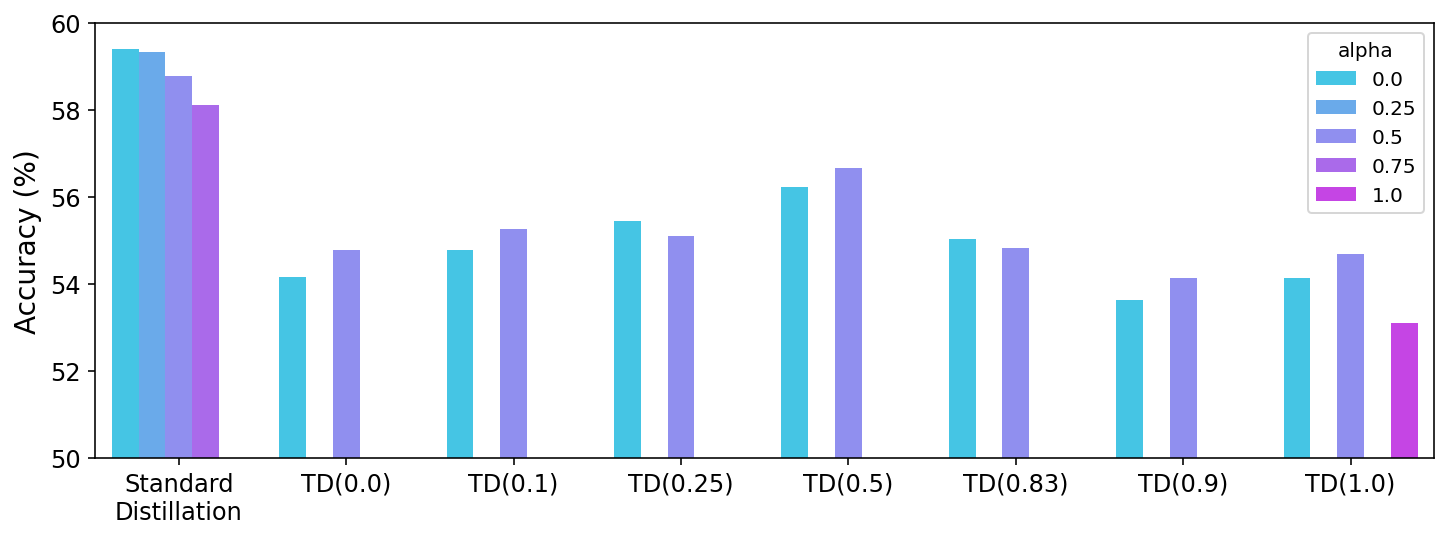

In [1497]:
plt.figure(figsize=(12,4))
g = sns.barplot(
  x="td",
  y="val",
  hue="alpha",
  data=internal_plot_df,
  palette="cool",
)
g.set_ylim(50, 60)

g.set_xlabel("")
g.set_ylabel("Accuracy (%)", fontsize=LABEL_FONTSIZE)
g.tick_params(axis='y', labelsize=TICKLABEL_FONTSIZE)
xticklabels = g.get_xticklabels()
xticklabels[0].set_text("Standard\nDistillation")
[xticklabel.set_text(f"TD({xticklabel.get_text()})") for xticklabel in xticklabels[1:]]
g.set_xticklabels(xticklabels, fontsize=TICKLABEL_FONTSIZE);

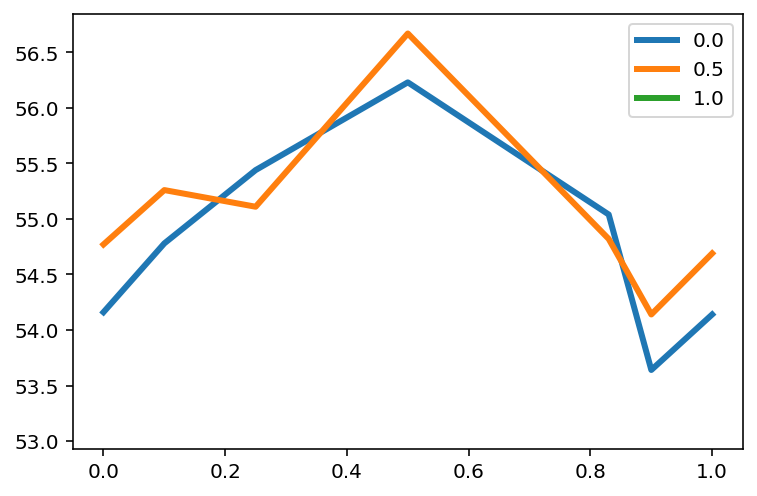

In [1498]:
for alpha, df_i in internal_asymptotic_df.groupby("alpha"):
  vals = np.array(df_i.val)
  tds = np.array(df_i.td)
  plt.plot(tds, vals, label=alpha, lw=3)
plt.legend()

In [1499]:
def set_bar_labels(g, asymptotic_df, fs=12, y_offset=None):
  target_df = asymptotic_df[
    (asymptotic_df.exp_name == "std") &
    (asymptotic_df.distillation) &
    (asymptotic_df.alpha==0.0)
  ]
  if len(target_df):
    target_val = target_df.iloc[0].val
  else:
    target_val = np.inf
    
  casc_vals = list(asymptotic_df[
    (asymptotic_df.exp_name=="cascaded") & (asymptotic_df.alpha==0.0)
  ].val)
  
  for bar in g.patches:
    if bar.get_height() in casc_vals:
        bar.set_x(bar.get_x()-0.05)
        if y_offset is not None:
          height = y_offset
        else:
          height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2.
        y = 1.005 * height
        g.text(
          x=x,
          y=y,
          s="CascadedTD", 
          fontsize=fs, 
          rotation=90,
          ha='center', 
          va='bottom',
        )

    elif bar.get_height() == target_val:
      bar.set_x(bar.get_x()-0.05)
      if y_offset is not None:
        height = y_offset
      else:
        height = bar.get_height()
      x = bar.get_x() + bar.get_width() / 2.
      y = 1.005 * height
      g.text(
        x=x,
        y=y,
        s="SerialCE", 
        fontsize=fs, 
        rotation=90,
        ha='center', 
        va='bottom',
      )

In [1500]:
figs_root = "figs/distillation"
if not os.path.exists(figs_root):
  os.makedirs(figs_root)

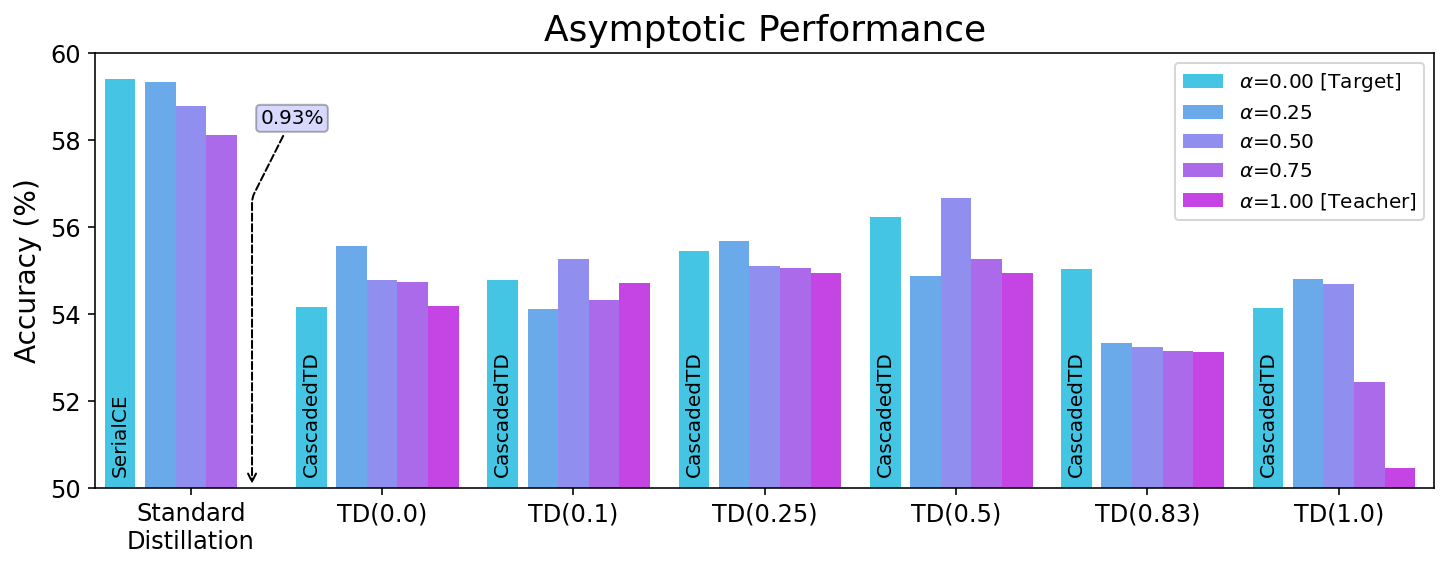

In [1504]:
plt.figure(figsize=(12,4))
TITLE_FONTSIZE = 18
LABEL_FONTSIZE = 14
TICKLABEL_FONTSIZE = 12
BAR_LABEL_FS = 10
CIFAR100_YLIM = (50, 60)
CIRAR10_YLIM = (0, 82)
PALETTE = "cool"  # cool, magma
g = sns.barplot(
    x="td", 
    y="val", 
    hue="alpha", 
    data=asymptotic_df, 
    palette=PALETTE
)
if EXP_NAME == "resnet18_small_CIFAR10":
  ylim_min, ylim_max = CIFAR10_YLIM
elif EXP_NAME == "resnet18_small_CIFAR100":
  ylim_min, ylim_max = CIFAR100_YLIM
g.set_ylim(ylim_min, ylim_max)
  
g.set_xlabel("")
g.set_ylabel("Accuracy (%)", fontsize=LABEL_FONTSIZE)
g.tick_params(axis='y', labelsize=TICKLABEL_FONTSIZE)

xticklabels = g.get_xticklabels()
xticklabels[0].set_text("Standard\nDistillation")
[xticklabel.set_text(f"TD({xticklabel.get_text()})") for xticklabel in xticklabels[1:]]
g.set_xticklabels(xticklabels, fontsize=TICKLABEL_FONTSIZE);
g.set_title("Asymptotic Performance", fontsize=TITLE_FONTSIZE)
handles, labels = g.get_legend_handles_labels()
for i, lbl in enumerate(labels):
  suffix = ""
  if lbl == "0.0":
    suffix = " [Target]"
  elif lbl == "1.0":
    suffix = " [Teacher]"
  labels[i] = r"$\alpha$={:0.2f}{}".format(float(lbl), suffix)

set_bar_labels(g, asymptotic_df, fs=BAR_LABEL_FS, y_offset=ylim_min)

# https://matplotlib.org/stable/gallery/userdemo/connectionstyle_demo.html
for bar in g.patches:
  if bar.get_height() < ylim_min:
    x1 = bar.get_x() + bar.get_width() / 2
    g.annotate(
      f"{bar.get_height():0.2f}%", 
      xy=(x1, ylim_min), 
      xytext=(20, 180), 
      textcoords='offset points', 
      ha='center', 
      va='bottom',
      bbox=dict(boxstyle='round,pad=0.2', fc="#8080ff", alpha=0.3),
      arrowprops={
        "arrowstyle": "->", 
        "connectionstyle": "arc,angleA=-90,angleB=90,armA=0,armB=290,rad=5", 
        "color": "k",
        "ls": "--",
      }
    )

# plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(handles, labels, loc="upper right")  # loc=(0.68, 0.6))

save_path = os.path.join(figs_root, "asymptotic_comparison.pdf")
plt.savefig(save_path, dpi=300)
plt.savefig(save_path.replace(".pdf", ".png"), dpi=300)

In [1502]:
# plt.figure(figsize=(12,4))
# limit_asymptotic_df = asymptotic_df[asymptotic_df.exp_name=="cascaded"]
# TITLE_FONTSIZE = 18
# LABEL_FONTSIZE = 14
# TICKLABEL_FONTSIZE = 12
# PALETTE = "cool"  # cool, magma
# g = sns.barplot(
#     x="td", 
#     y="val", 
#     hue="alpha", 
#     data=limit_asymptotic_df, 
#     palette=PALETTE
# )
# if EXP_NAME == "resnet18_small_CIFAR10":
#   g.set_ylim(82, 88)
# elif EXP_NAME == "resnet18_small_CIFAR100":
#   g.set_ylim(52, 57)
  
# g.set_xlabel("")
# g.set_ylabel("Accuracy (%)", fontsize=LABEL_FONTSIZE)
# g.tick_params(axis='y', labelsize=TICKLABEL_FONTSIZE)

# xticklabels = g.get_xticklabels()
# # xticklabels[0].set_text("Standard Distillation")
# [xticklabel.set_text(f"TD({xticklabel.get_text()})") for xticklabel in xticklabels]
# g.set_xticklabels(xticklabels, fontsize=TICKLABEL_FONTSIZE);
# # g.set_title("Asymptotic Performance", fontsize=TITLE_FONTSIZE)
# handles, labels = g.get_legend_handles_labels()
# for i, lbl in enumerate(labels):
#   suffix = ""
#   if lbl == "0.0":
#     suffix = " [Target]"
#   elif lbl == "1.0":
#     suffix = " [Teacher]"
#   labels[i] = r"$\alpha$={:0.2f}{}".format(float(lbl), suffix)

# set_bar_labels(g, limit_asymptotic_df)
      
# # plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.legend(handles, labels, loc='upper right')

# save_path = os.path.join(figs_root, "asymptotic_comparison_limit.pdf")
# plt.savefig(save_path, dpi=300)
# plt.savefig(save_path.replace(".pdf", ".png"), dpi=300)